In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

37204


In [109]:
figure_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817'
exampleCell_figure_folder = os.path.join(figure_folder, '3D_rendering')
if not os.path.exists(exampleCell_figure_folder):
    print(exampleCell_figure_folder)
    os.makedirs(exampleCell_figure_folder)

In [3]:
fov_id = 2

In [6]:
folders, fovs = ia.io_tools.data.get_folders(r'\\10.245.74.158\Chromatin_NAS_7\20220713-P_brain_CTP11-13_from_0418')

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 78
- Number of field of views: 200


In [28]:
segLabel_filename = os.path.join(r'F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418',
                                 'Analysis_0709', 'Segmentation', fovs[fov_id].replace('.dax','_Segmentation.hdf5'))
print(segLabel_filename)
with h5py.File(segLabel_filename, 'r') as _f:
    segLabels = _f[str(fov_id)]['dna_mask'][:]
transSegLabels = np.flip(segLabels.transpose((0,2,1)),axis=(2,))

F:\Pu_Temp\20220713-P_brain_CTP11-13_from_0418\Analysis_0709\Segmentation\Conv_zscan_002_Segmentation.hdf5


In [29]:
ref_export_file = os.path.join(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export', 
                               f'Decoded_Fov-{fov_id}.hdf5')

with h5py.File(ref_export_file, 'r') as _f:
    print(_f.keys())
    ref_cell_ids = list(_f.keys())
ref_cell_ids = [int(_n.split('-')[1]) for _n in ref_cell_ids]

<KeysViewHDF5 ['Cell-100', 'Cell-101', 'Cell-102', 'Cell-103', 'Cell-104', 'Cell-105', 'Cell-106', 'Cell-107', 'Cell-108', 'Cell-109', 'Cell-11', 'Cell-111', 'Cell-112', 'Cell-113', 'Cell-115', 'Cell-117', 'Cell-118', 'Cell-119', 'Cell-12', 'Cell-120', 'Cell-121', 'Cell-123', 'Cell-124', 'Cell-126', 'Cell-127', 'Cell-129', 'Cell-13', 'Cell-130', 'Cell-132', 'Cell-134', 'Cell-135', 'Cell-136', 'Cell-137', 'Cell-14', 'Cell-141', 'Cell-15', 'Cell-150', 'Cell-17', 'Cell-18', 'Cell-19', 'Cell-20', 'Cell-21', 'Cell-22', 'Cell-23', 'Cell-24', 'Cell-25', 'Cell-27', 'Cell-28', 'Cell-29', 'Cell-31', 'Cell-32', 'Cell-33', 'Cell-35', 'Cell-36', 'Cell-37', 'Cell-38', 'Cell-39', 'Cell-4', 'Cell-40', 'Cell-43', 'Cell-45', 'Cell-46', 'Cell-47', 'Cell-48', 'Cell-50', 'Cell-51', 'Cell-52', 'Cell-54', 'Cell-55', 'Cell-56', 'Cell-57', 'Cell-58', 'Cell-59', 'Cell-6', 'Cell-60', 'Cell-61', 'Cell-63', 'Cell-64', 'Cell-65', 'Cell-66', 'Cell-67', 'Cell-7', 'Cell-75', 'Cell-76', 'Cell-78', 'Cell-80', 'Cell-82',

In [43]:
# load blair's data
import pandas as pd
data_folder = r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\0814-Sample_Result_Blair'
data_df = pd.read_hdf(os.path.join(data_folder, f'0713_SE_{fov_id}_spalign.h5'))
data_df['x_hat'] = 2048 - data_df['x_hat']
#data_df['y_hat'] = 2048 - data_df['y_hat']

<IPython.core.display.Javascript object>


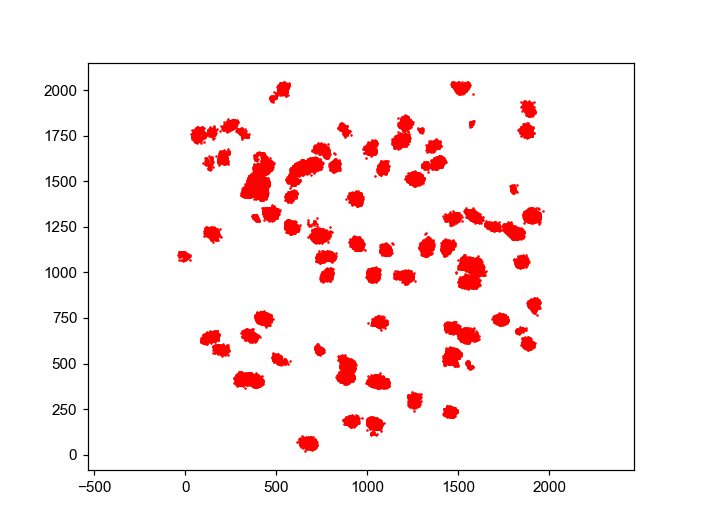

(-139.0817701666668, 2067.0093735, -84.63021130000003, 2148.861238633334)

In [44]:
plt.figure()
#plt.imshow(transSegLabels.max(0))
plt.scatter(data_df['x_hat'], data_df['y_hat'],s=0.5, c='red')
plt.axis('equal')

<IPython.core.display.Javascript object>


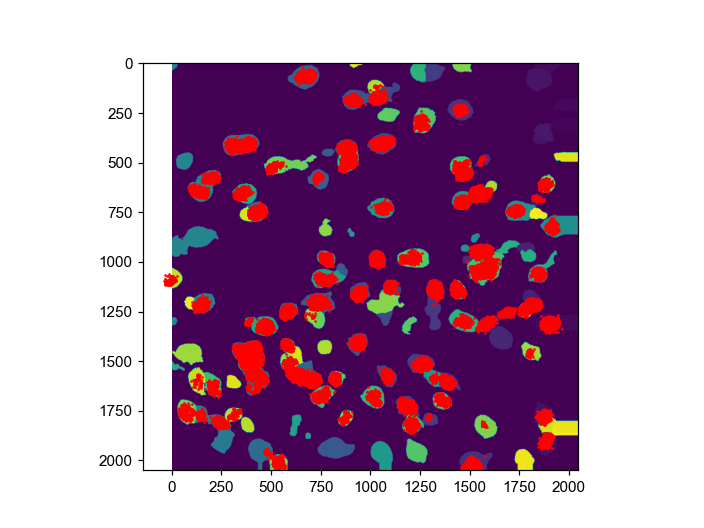

In [45]:
plt.figure()
plt.imshow(transSegLabels.max(0))
plt.scatter(data_df['x_hat'], data_df['y_hat'],s=0.5, c='red')


In [11]:
from skimage.measure import find_contours

cell_id = 33 # 96

vertices = (find_contours((transSegLabels==cell_id).max(0))[0])

xs, ys = np.where((transSegLabels==cell_id).any(0))

In [47]:
_flt = (data_df['y_hat'] > min(xs)) & (data_df['y_hat'] < max(xs)) & (data_df['x_hat'] > min(ys)) & (data_df['x_hat'] < max(ys))
data_df[_flt]

,FOV,replicate,finalcellID,celltype,chr,start,end,hyb,x_hat,y_hat,...,sig_z,center_intensity,center_internal_dist,codebook_name,num_spots,uindex,rowID,Score,fiberidx,numfiber
3,2,0713,214,Oligo,chr1,3742742,3759944,0,1061.099800,429.859010,...,1,1910.169500,138.543642,CTP11,2,0,737819,2233.125467,1,3
8,2,0713,214,Oligo,chr1,6245958,6258969,1,1056.636547,427.994713,...,1,3487.433400,23.942182,CTP11,3,1,737824,2233.125467,1,3
13,2,0713,214,Oligo,chr1,8740008,8759916,2,1052.821280,425.165390,...,1,1067.333480,223.863391,CTP11,2,2,737829,2233.125467,1,3
17,2,0713,214,Oligo,chr1,9799472,9811359,4,1057.302657,425.557383,...,1,2546.132367,159.154510,CTP13,3,1017,737833,2233.125467,1,3
22,2,0713,214,Oligo,chr1,13741888,13757922,6,1052.235833,429.700227,...,1,1954.142700,127.556992,CTP11,3,4,737838,2233.125467,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2,0713,214,Oligo,chrX,151244970,151259694,54,1071.859620,401.906573,...,1,1728.680700,34.370134,CTP11,3,979,746161,3188.870307,1,1
127,2,0713,214,Oligo,chrX,153743904,153759903,55,1067.800355,393.331640,...,1,1104.928170,208.742370,CTP11,2,980,746167,3188.870307,1,1
132,2,0713,214,Oligo,chrX,158749404,158759978,57,1071.564750,396.014970,...,1,1558.580200,185.842007,CTP11,2,982,746172,3188.870307,1,1
140,2,0713,214,Oligo,chrX,163750534,163758706,59,1094.015333,415.002197,...,1,2105.144500,208.613888,CTP11,3,984,746180,3188.870307,1,1


In [58]:
cell_data_df.columns

Index(['FOV', 'replicate', 'finalcellID', 'celltype', 'chr', 'start', 'end',
       'hyb', 'x_hat', 'y_hat', 'z_hat', 'sig_x', 'sig_y', 'sig_z',
       'center_intensity', 'center_internal_dist', 'codebook_name',
       'num_spots', 'uindex', 'rowID', 'Score', 'fiberidx', 'numfiber'],
      dtype='object')

In [48]:
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

In [51]:
np.unique(data_df[_flt]['finalcellID'])

array([214], dtype=int64)

In [52]:
cell_data_df = data_df[_flt]

In [95]:
default_infoNames = ['FOV', 'replicate', 'finalcellID', 'celltype']
def spAligner_2_chr2homologList(cell_data_df, codebook, voxel_size=108, 
                                info_names=default_infoNames,
                                fill_blank=True):
    # init
    chr_2_homologList = {}
    # loop through chrs 
    for _chr_name in np.unique(cell_data_df['chr']):
        if 'chr' in _chr_name:
            _chr = _chr_name.split('chr')[1]
        else:
            _chr = _chr_name
        # sel chr codebook
        _chr_codebook = codebook[codebook['chr']==_chr]
        # search chr
        _chr_df = cell_data_df[cell_data_df['chr']==_chr_name]
        # init homologs
        _homologs = []
        for _i_fbr in np.unique(_chr_df['fiberidx']):
            _fbr_df = _chr_df[_chr_df['fiberidx']==_i_fbr].copy().sort_values('hyb')
            _inds = _fbr_df['hyb'].values
            _coords = _fbr_df[['z_hat', 'x_hat', 'y_hat']].values * float(voxel_size)
            if fill_blank:
                _full_coords = np.ones([len(_chr_codebook),3]) * np.nan
                _full_coords[_inds] = _coords
                _homologs.append(_full_coords)
            else:
                _homologs.append(_coords)
        # append
        chr_2_homologList[_chr] = _homologs
    # summary info_dict
    info_dict = {}
    for _n in info_names:
        info_dict[_n] = np.unique(cell_data_df[_n])[0]
        
    return chr_2_homologList, info_dict

chr_2_zxys, info_dict = spAligner_2_chr2homologList(cell_data_df, codebook)


In [283]:
def Merge_Chr2ZxysList(chr_2_zxys_list,):
    from ImageAnalysis3.structure_tools.distance import sort_chr
    # init
    full_zxys_list = []
    full_chr_ids = []
    full_homolog_ids = []
    # collect
    for _chr in list(sorted(chr_2_zxys_list.keys(), key = lambda v:sort_chr(v))):
        full_zxys_list.extend(list(chr_2_zxys_list[_chr]))
        for _ih, _zxys in enumerate(chr_2_zxys_list[_chr]):
            full_chr_ids.append(np.array([_chr]*len(_zxys)))
            full_homolog_ids.append(np.array([_ih]*len(_zxys)))
    # merge
    full_zxys_list = np.concatenate(full_zxys_list)
    full_chr_ids = np.concatenate(full_chr_ids)
    full_homolog_ids = np.concatenate(full_homolog_ids)
    return full_zxys_list, full_chr_ids, full_homolog_ids
    

In [285]:
merged_zxys

array([[  7722.019     , 114598.7784    ,  46424.77308   ],
       [  7427.21033333, 114116.74704   ,  46223.42904   ],
       [  7167.209875  , 113704.69824   ,  45917.86212   ],
       ...,
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [  8200.1725    , 116212.5873    ,  43934.90058   ]])

In [282]:
np.concatenate(merged_hids).shape

(5594,)

In [220]:
def Centering_Chr2ZxysListDict(chr_2_zxys_list):
    # center
    
    _all_zxys = []
    for _zxys_list in chr_2_zxys_list.values():
        _all_zxys.extend(list(_zxys_list))
    _center = np.nanmean(np.concatenate(_all_zxys), axis=0)
    _centered_dict = {}
    for _chr, _zxys_list in chr_2_zxys_list.items():
        _centered_dict[_chr] = _zxys_list - _center[np.newaxis,:]
        
    return _centered_dict

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width #_dpi,,,_single_row_height,_ref_bar_length, 
from ImageAnalysis3.structure_tools.distance import sort_chr

figure_width = _single_col_width
figure_dpi=300
background_color = [0,0,0]
cmap = copy.copy(cm.Spectral)


In [222]:
_ticklabel_size

2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 'X']

In [228]:
cbar.ax.get_xlim()

(1.0, 24.0)

<IPython.core.display.Javascript object>


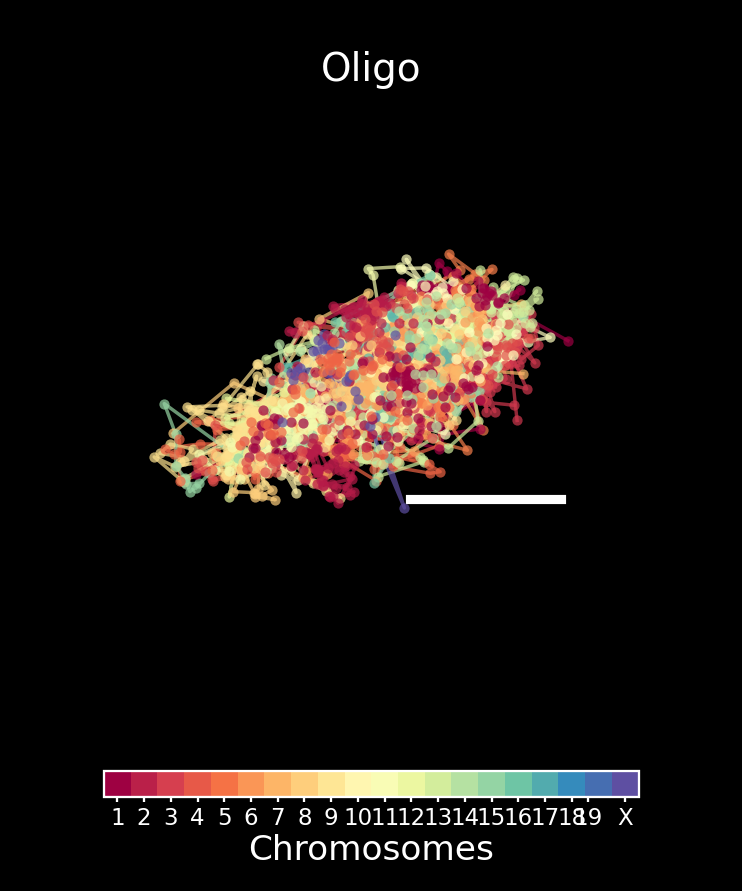

1.0471975511965976 0.5235987755982988


In [250]:
# select cell
plt.style.use('dark_background')
#plt.style.use('default')

_cell_type = info_dict['celltype']
_cell_fov_id = info_dict['FOV']
_cell_cell_id = info_dict['finalcellID']
_dict = chr_2_zxys

from matplotlib.colors import BoundaryNorm
from matplotlib import animation
plot_animation = False
hide_axes = True
add_refBar = True
refBar_len = 5 # in um
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
_chr_2_color = {_key:cmap((sort_chr(_key)-1)/22) for _key in sorted(_dict.keys(), key = lambda v:sort_chr(v))}

plot_radius = 6

marker_size = 5
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width*1.2), dpi=figure_dpi)

ax3d = fig.add_subplot(111, projection='3d', azim=60, elev=30)
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
# turn off axes if needed
if hide_axes:
    ax3d.set_axis_off()
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
ax3d.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
# title
ax3d.set_title(f"{_cell_type}" ,fontsize=_font_size+1, pad=0)
# colorbar
bounds = [sort_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_chr(v))), fontsize=_font_size)

cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                    width=_ticklabel_width, length=_ticklabel_size/2,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

# save
fig_basename = f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_fov_{_cell_fov_id}_cell_{_cell_cell_id}"
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(exampleCell_figure_folder, fig_basename+".gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # add ref
    if add_refBar:
        # convert to degree, which matches numpy cos and sin
        _azim = (ax3d.azim%360) / 180 * np.pi 
        _elev = (ax3d.elev%360) / 180 * np.pi
        print(_azim, _elev)
        # start coordinate for colorbar
        _bar_starts = np.array([-0.99, # z, draw to the bottom
                                -np.sin(_azim), # x, y, extension goes through 0,0
                                np.cos(_azim), 
                                ]) * plot_radius
        # ongoing vector for colorbar:
        _bar_vector = np.array([0,
                                np.sin(_azim),
                                -np.cos(_azim),
                                ]) * refBar_len
        # therefore, end of colorbar
        _bar_ends = _bar_starts + _bar_vector
        #print(_bar_starts, _bar_ends)
        _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                              [_bar_starts[2], _bar_ends[2]], 
                              [_bar_starts[0], _bar_ends[0]], 
                              color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                              linewidth=2)

    # save pdf and png
    fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".pdf"),
                transparent=False, bbox_inches='tight', pad_inches=0)
    fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".png"),
                transparent=False, bbox_inches='tight', pad_inches=0)
fig.show()
        

In [ ]:
# select cell
plt.style.use('dark_background')
#plt.style.use('default')

_cell_type = info_dict['celltype']
_cell_fov_id = info_dict['FOV']
_cell_cell_id = info_dict['finalcellID']
_dict = chr_2_zxys

#_sel_chr = '2'

for _sel_chr in _dict.keys():

    if len(_dict[_sel_chr]) == 1:
        _homolog_2_color = {0:cmap(1/2)}
    else:
        _homolog_2_color = {_i:cmap((_i) / (len(_dict[_sel_chr])-1) ) 
                            for _i in range(len(_dict[_sel_chr]))}


    from matplotlib.colors import BoundaryNorm
    from matplotlib import animation
    plot_animation = False
    hide_axes = True
    add_refBar = True
    refBar_len = 5 # in um
    angle = 3

    _centered_dict = Centering_Chr2ZxysListDict(_dict)
    plot_radius = 6

    marker_size = 5
    marker_alpha = 1

    depthshade=False
    fig = plt.figure(figsize=(figure_width, figure_width*1.2), dpi=figure_dpi)

    ax3d = fig.add_subplot(111, projection='3d', azim=60, elev=30)
    ax3d.set_facecolor(background_color)
    fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
    # turn off axes if needed
    if hide_axes:
        ax3d.set_axis_off()
    # turn off grid if needed
    ax3d.grid(False)
    ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    # all spots as ref
    merged_zxys, merged_cids, merged_hids = Merge_Chr2ZxysList(_centered_dict)
    merged_zxys = merged_zxys/1000
    _valid_inds = (np.isnan(merged_zxys).sum(1) == 0)
    _sc = ax3d.scatter(merged_zxys[_valid_inds,1], merged_zxys[_valid_inds,2], merged_zxys[_valid_inds,0],
                       color='Grey', 
                       s=marker_size-1, depthshade=depthshade, 
                       alpha=0.15,
                       linewidth=0, label=f"h_{_ihomo}")

    # scatter plot
    _zxys_list = _centered_dict[_sel_chr]/1000
    for _ihomo, _zxys in enumerate(_zxys_list):
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_homolog_2_color[_ihomo], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"h_{_ihomo}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_homolog_2_color[_ihomo], linewidth=0.75, alpha=marker_alpha)

    ax3d.tick_params('both', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

    # axes limits
    ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
    ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
    ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
    # axes ticks
    ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
    ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
    ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
    # axes labels
    ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
    ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
    ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
    # title
    ax3d.set_title(f"{_cell_type}: chr{_sel_chr}" ,fontsize=_font_size+1, pad=0)
    # colorbar
    if len(_dict[_sel_chr]) == 1:
        bounds = [-1,0]
    else:
        bounds = list(np.arange(len(_dict[_sel_chr])+1 ))
    #bounds.append(np.max(bounds)+1)
    bounds = np.sort(bounds)
    norm = BoundaryNorm(bounds, cmap.N)
    cbar_shrink = 0.8
    m = cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                        ticks=bounds[:-1]+0.5,
                        boundaries=bounds,
                        shrink=cbar_shrink)
    cbar.set_label('Homologs', fontsize=_font_size, labelpad=1,)
    cbar.ax.set_xticklabels(np.arange(len(_dict[_sel_chr])), fontsize=_font_size)
    cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                        width=_ticklabel_width, length=_ticklabel_size/2,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

    # save
    fig_basename = f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_fov_{_cell_fov_id}_cell_{_cell_cell_id}_chr_{_sel_chr}"
    # animation
    if plot_animation:
        def rotate3D(angle):
             ax3d.view_init(azim=angle)
        ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
        ani.save(os.path.join(exampleCell_figure_folder, fig_basename+".gif"), 
                 writer=animation.PillowWriter(fps=30), )
    else:
        # add ref
        if add_refBar:
            # convert to degree, which matches numpy cos and sin
            _azim = (ax3d.azim%360) / 180 * np.pi 
            _elev = (ax3d.elev%360) / 180 * np.pi
            print(_azim, _elev)
            # start coordinate for colorbar
            _bar_starts = np.array([-0.99, # z, draw to the bottom
                                    -np.sin(_azim), # x, y, extension goes through 0,0
                                    np.cos(_azim), 
                                    ]) * plot_radius
            # ongoing vector for colorbar:
            _bar_vector = np.array([0,
                                    np.sin(_azim),
                                    -np.cos(_azim),
                                    ]) * refBar_len
            # therefore, end of colorbar
            _bar_ends = _bar_starts + _bar_vector
            #print(_bar_starts, _bar_ends)
            _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                                  [_bar_starts[2], _bar_ends[2]], 
                                  [_bar_starts[0], _bar_ends[0]], 
                                  color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                                  linewidth=2)

        # save pdf and png
        fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".pdf"),
                    transparent=False, bbox_inches='tight', pad_inches=0)
        fig.savefig(os.path.join(exampleCell_figure_folder, fig_basename+".png"),
                    transparent=False, bbox_inches='tight', pad_inches=0)
    fig.show()

## 2D projection

In [ ]:
cmap.N

In [267]:
bounds

array([0.5, 1.5, 2.5])

In [ ]:
bar

In [177]:
np.cos(90/180*np.pi)

6.123233995736766e-17

In [189]:
np.sin(300/180*np.pi)

-0.8660254037844386

In [184]:
np.cos(ax3d.azim%360 /180 * np.pi)

0.5000000000000001

In [179]:
(ax3d.azim%360) / 180

1.6666666666666667

In [187]:
_bar_ends

array([0.        , 4.33012702, 2.5       ])

In [185]:
_bar_ends/bar_l

array([0.       , 0.8660254, 0.5      ])

In [164]:
ax3d.azim 

-60

In [160]:
np.pi

3.141592653589793

In [156]:
_bar_starts

array([-2.59807621,  3.34807621,  0.20096189])

In [157]:
_bar_ends

array([-2.59807621,  7.67820323,  2.70096189])

In [152]:
plot_radius

6

In [151]:
np.sin(_elev)*np.cos(_azim)

0.25

In [ ]:
-np.sin(_azim) +np.sin(_elev)*np.cos(_azim)